In [98]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 가설검정 및 통계 분석 패키지
from scipy import stats

# 선형모델 formula ( y ~ x1 + x2 + ...)
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from statsmodels.api import qqplot, add_constant

%matplotlib inline

matplotlib.rc('font', family = 'Malgun Gothic')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [49]:
df = pd.DataFrame({'sample': [74.5, 81.2, 73.8, 82.0, 76.3, 
                             75.7, 80.2, 72.6, 77.9, 82.8]})

df.describe().round(2)

,sample
count,10.00
mean,77.70
std,3.66
min,72.60
25%,74.80
50%,77.10
75%,80.95
max,82.80


In [50]:
t_result = stats.ttest_1samp(df, 76.7)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("1-Sampe t-tesst")
print("t 검정통계량: {}".format(t))
print("p-value: {}".format(p))

1-Sampe t-tesst
t 검정통계량: [0.864]
p-value: [0.41]


※ 결론: 유의수준 5%에서 검정결과가, P값이 0.41이므로 개선활동으로 고객만족도 변화를 시켰다고 할 수 없다.

## 2-Sample test

In [12]:
df = pd.read_csv("./Data2/2sample.csv")

<AxesSubplot:>

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


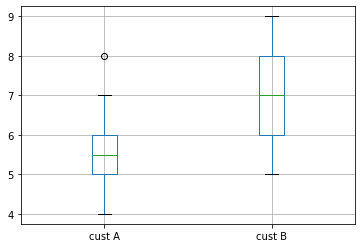

In [13]:
df.boxplot(['cust A', 'cust B'])

In [14]:
statistic, p = stats.shapiro(df['cust A'])
print("statistic = {}, p-value = {}".format(statistic, p))

statistic = 0.9094840288162231, p-value = 0.06230909377336502


In [20]:
statistic, p = stats.shapiro(df['cust B'])
print("statistic = {}, p-value = {}".format(statistic, p))

statistic = 0.9119446873664856, p-value = 0.06941930204629898


※ 'cust A' p-balue가 0.06, 'cust B' p-value가 0.07이므로, 두 집단 모두 정규성이 있다고 할 수 있다.

In [21]:
stats.levene(df['cust A'], df['cust B'])

LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)

※ p-value가 0.83이므로, 두 집단의 분산은 같다고 할 수 있다.

In [22]:
t_result = stats.ttest_ind(df['cust A'], df['cust B'], equal_var = True) # 등분산 있다.

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t검정통계량: {}".format(t))
print("p-value: {}".format(p))

# 유의수준 5%에서 A고객만족도와 B고객의 만족도가 차이가 있을 수 있다.
# p-value만 유의수준과 비교하면 된다.

2-Sample t-test
t검정통계량: -3.596
p-value: 0.001


## Paired t-test

In [56]:
df = pd.read_csv("./Data2/paired.csv", engine = "python")
df.head()
df1, df2 = df[["before"]], df[['after']]

In [57]:
t_result = stats.ttest_rel(df['before'], df['after'])

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("Paired t-test")
print('t검정 통계량 = %.3f, pvalue = %.3f' %t_result)

Paired t-test
t검정 통계량 = -5.324, pvalue = 0.000


※ 유의수준 5%에서 검정결과 P값이 0.000이므로 학원을 다닌 이후 차이가 있다는 H1가설을 채택할 수 있다.

### Proportion Test
- $H_0$ == 0.1
- $H_1$ != 0.1

In [33]:
count = 15
n_obs = 100 # 전체 고객 수
value = 0.1

stat, pval = proportions_ztest(count, n_obs, value)

In [36]:
print("1 Proportion test")
print("z: {0:0.3f}".format(stat))
print("p: {0:0.3f}".format(pval))

1 Proportion test
z: 1.400
p: 0.161


※ p-value가 0.161로 유의수준보다 크므로, H0을 채택한다. 따라서 사용비율의 차이가 없다.

### 2 Proportion Test
- $H_0$: p1 = p2
- $H_1$: p1 $\ne$ p2

In [41]:
count = np.array([4, 1]) # 불량의 개수
n_obs = np.array([1000, 1200])
stat, pval = proportions_ztest(count, n_obs)

print("2-Proportion test")

print('z검정통계량: {:0.3f}'.format(stat))
print('p-value: {:0.3f}'.format(pval))

2-Proportion test
z검정통계량: 1.553
p-value: 0.120


※ 두 공장의 불량률은 차이가 없다고 할 수 있다. p-value > 0.05

## 카이제곱 검정

In [45]:
df = pd.read_csv("./Data2/카이제곱_근무조.csv", engine = "python")
df.head()

,work_1,work_2,work_3,work_4
0,270,260,236,234
1,228,285,225,262
2,277,284,231,208


In [47]:
from scipy.stats import chi2_contingency

# 카이, pvalue, 자유도, 기대치
chi, pval, dof, expected = stats.chi2_contingency(df)

print("chi-square test")
print("chi-square: {0:0.2f}".format(chi))
print("p-value:  {:0.3f}".format(pval))
print("degree of freedom: {}".format(dof))
print("expected value: \n {}".format(expected.round(1)))

chi-square test
chi-square: 13.37
p-value:  0.038
degree of freedom: 6
expected value: 
 [[258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]]


※ 0.038 < 0.05 H1채택, 생산에 있어 근무조별로 제품을 생산하는 부하 차이가 있다고 할 수 있다.

### One Way ANOVA
- $H_0$: 모든 그룹의 토익 성적은 차이가 없다.
- $H_1$: 적어도 하나의 그룹의 토익 성적에 차이가 있다.

In [51]:
df = pd.read_csv("./Data2/ANOVA1.csv", engine = "python")
df.head()

,A_G,B_G,C_G
0,892,721,621
1,623,821,915
2,721,910,888
3,678,678,721
4,723,723,894


<AxesSubplot:>

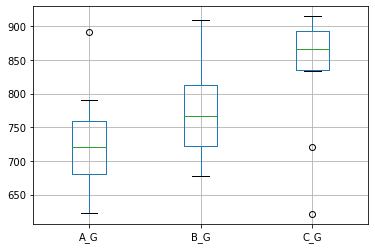

In [53]:
# 박스플롯만으로도 차이가 있음을 확인할 수 있다.
df.boxplot(['A_G', 'B_G', 'C_G'])

In [55]:
f_result = stats.f_oneway(df['A_G'], df['B_G'], df['C_G'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way ANOVA")
print("F통계량: {}".format(f))
print("p-value: {}".format(p))

One-way ANOVA
F통계량: 4.263
p-value: 0.025


※ $H_1$을 채택하고, 그룹 간에 성적에 차이가 있다고 할 수 있다.

## 상관분석

In [58]:
df = pd.read_csv("./Data2/작업시간.csv", engine = 'python')
df.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


<AxesSubplot:xlabel='UNITS', ylabel='MINUTES'>

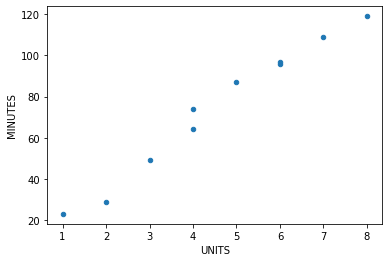

In [61]:
df.plot.scatter(x = "UNITS", y = "MINUTES")

In [65]:
corr, pval = stats.pearsonr(df["UNITS"], df["MINUTES"])
# 상관계수를 알기 위해 r을 입력

In [66]:
print("Correlation Analysis ")
print("Correlation : {0:0.3f} ".format(corr))
print("p-value : {0:0.3f}".format(pval))

Correlation Analysis 
Correlation : 0.989 
p-value : 0.000


※ 부품 수리시간과 부품 수 간에 매우 강한 상관성이 있다고 할 수 있다.

In [67]:
df.corr(method = "pearson").round(3) 

# kendall, spearman도 있지만 주로 pearson을 사용한다.

,UNITS,MINUTES
UNITS,1.000,0.989
MINUTES,0.989,1.000


### 회귀분석 예제

In [71]:
df_raw = pd.read_csv("./Data2/작업시간.csv", engine = "python")
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [73]:
df_raw.describe().round(3) # 50%의 값은 median이다.

,UNITS,MINUTES
count,10.000,10.000
mean,4.600,74.700
std,2.221,32.961
min,1.000,23.000
25%,3.250,52.750
50%,4.500,80.500
75%,6.000,96.750
max,8.000,119.000


<AxesSubplot:xlabel='UNITS', ylabel='MINUTES'>

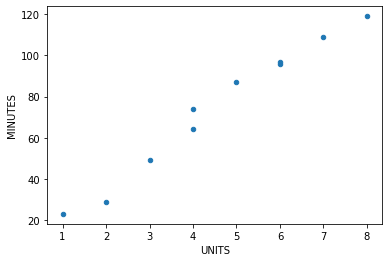

In [76]:
# 목표변수와 설명변수의 산점도
df_raw.plot.scatter(x = "UNITS", y = "MINUTES")

<AxesSubplot:xlabel='UNITS', ylabel='MINUTES'>

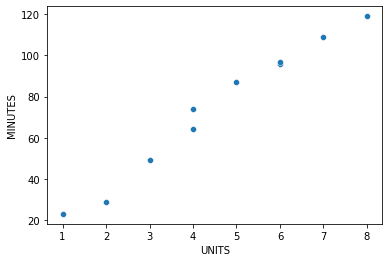

In [77]:
sns.scatterplot(data=df_raw, x="UNITS", y = "MINUTES")

※ 목표변수와 설명변수간의 양의 상관관계가 있다고 할 수 있다.

In [78]:
# 목표변수와 설명변수의 상관계수
df_raw.corr(method = "pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.989
MINUTES,0.989,1.000


※ 상관계수가 0.989로 굉장히 높은 선형관계를 가지고 있다고 할 수 있다.

In [79]:
# 선형회귀분석: formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept)은 자동 추가
formula = "MINUTES ~ UNITS"
reg_model = smf.ols(formula, data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     365.3
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           5.82e-08
Time:                        17:07:55   Log-Likelihood:                -29.401
No. Observations:                  10   AIC:                             62.80
Df Residuals:                       8   BIC:                             63.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1712      3.886      1.845      0.1

/home/piai/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


- F통계량도 굉장히 높고, P-value도 굉장히 낮다.
- P-value만 봐도 된다. 
- t검정을 해서 coefficient값의 유의미함은 p-value의 의미를 보고 확인한다.


- Omnibus: 잔차의 정규성을 보는 것. 0.943이면 자체의 정규성이 있다는 뜻
- Durbin-Watson: 잔차의 독립성에 관한 것

### 오차의 기본가정(등분산성/독립성)

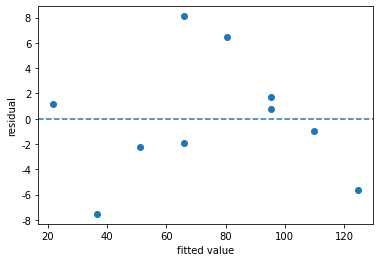

In [82]:
# 잔차의 등분산성
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

# 랜덤하게 존재하므로 등분산성이 존재한다.

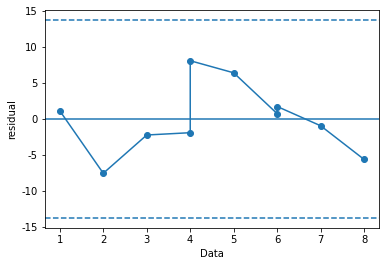

In [85]:
# 잔차의 독립성
plt.plot(df_raw["UNITS"], reg_result.resid, marker = "o")
plt.xlabel("Data")
plt.ylabel("residual")

plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = "--")

### 정규성 검정

/home/piai/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=0.11824145900305023, pvalue=0.9425929635087629)

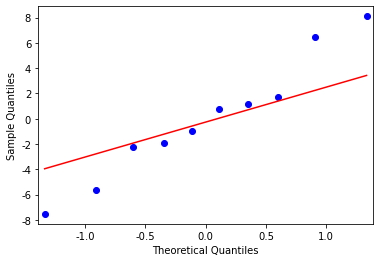

In [99]:
qqplot(reg_result.resid, line="q")

from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

### 결론 도출

최종회귀식 $\hat{y}$=4.1617 + 15.5088 * UNITS --> 부품 수가 1단위 증가할 때마다 수리 시간은 15.5분 증가한다.

- 부품의 수가 12개일 때 예상 수리 시간은?
    - $\hat{y}$= 4.1617+ 15.5088*12 = 190.263 MInutes